In [58]:
import scipy
import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *  # MATLAB-like functions
import numpy as np

In [59]:
# System control period
Ts = 1/10e3

In [60]:
# Parameters
Rs = 0.1
Ls = 0.0001

In [61]:
# Transfer function
Gs = tf(1, [Ls, Rs])

print(Gs)


      1
--------------
0.0001 s + 0.1



In [62]:
# close loop control transfer function
H = 1
Gcl = feedback(Gs, H)
kr = dcgain(Gcl)
Gcl = Gcl/kr

print(Gcl)


       1
---------------
9.091e-05 s + 1



**Pad´e-approximation of a time delay**

In [63]:
Td = 1 * Ts
n_pade = 10
num_pade, den_pade = pade(Td, n_pade)
H_pade = tf(num_pade, den_pade)

Gsd = series(Gs, H_pade)

In [64]:
# close loop control with delay
Gcld = feedback(Gsd, H)
kr =  dcgain(Gcld)
Gcld = Gcld/kr

print(Gcld)


          s^10 - 1.1e+06 s^9 + 5.94e+11 s^8 - 2.059e+17 s^7 + 5.045e+22 s^6 - 9.081e+27 s^5 + 1.211e+33 s^4 - 1.176e+38 s^3 + 7.939e+42 s^2 - 3.352e+47 s + 6.704e+51
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
9.091e-05 s^11 + 101 s^10 + 5.31e+07 s^9 + 1.931e+13 s^8 + 4.418e+18 s^7 + 8.76e+23 s^6 + 1.026e+29 s^5 + 1.19e+34 s^4 + 6.255e+38 s^3 + 3.841e+43 s^2 + 3.352e+47 s + 6.704e+51



### Plot Step Response

C:\Users\jimchen.AATECH\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=1.29381e-88): result may not be accurate.
  return solve(Q, P)


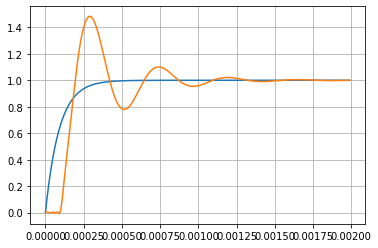

In [65]:
t = np.arange(0, 0.002, 1e-5)

yout, T = step(Gcl, t)
plt.plot(T.T, yout.T)

yout, T = step(Gcld, t)
plt.plot(T.T, yout.T)
plt.grid()

### Plot Bode diagram

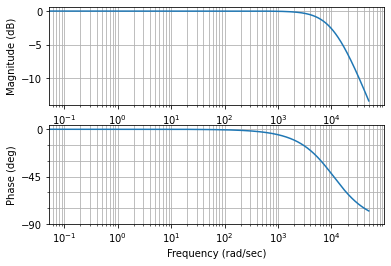

In [66]:
w = np.arange(0, 0.5e5, 0.1)
mag1, phase1, om1 = bode(Gcl, w)

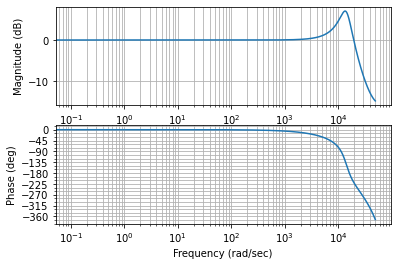

In [67]:
mag2, phase2, om2 = bode(Gcld, w)

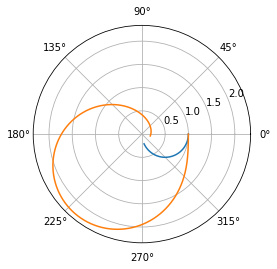

In [68]:
plt.polar(phase1, mag1, phase2, mag2)
plt.grid(True)

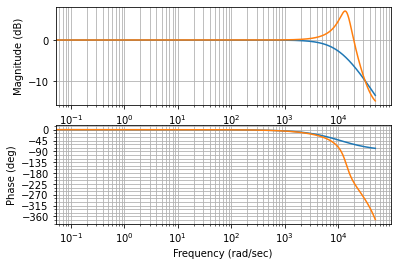

In [69]:
m, p, o = bode(Gcl, Gcld, w)

### Discrete Analysis

Consider this system is under discrete-time domain

In [70]:
# discrete transfer function without time-delay
Tz = c2d(Gcl, Ts)

In [71]:
# discrete transfer function with time-delay
Tzd = c2d(Gcld, Ts)

C:\Users\jimchen.AATECH\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=8.2804e-89): result may not be accurate.
  return solve(Q, P)


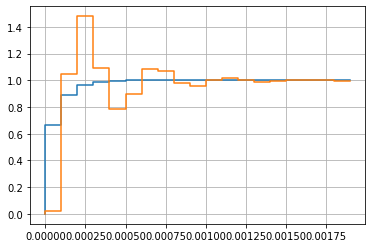

In [72]:
t = np.arange(0, 0.002, Ts)
yout, T = step(Tz, t)
plt.step(T.T, yout.T)
yout, T = step(Tzd, t)
plt.step(T.T, yout.T)
plt.grid()
plt.show()

C:\Users\jimchen.AATECH\AppData\Local\Programs\Python\Python39\lib\site-packages\control\lti.py:199: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")


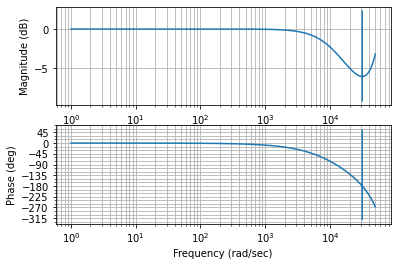

In [73]:
w = np.arange(1, 0.5e5, 1)
mag1, phase1, om1 = bode(Tz, w)

C:\Users\jimchen.AATECH\AppData\Local\Programs\Python\Python39\lib\site-packages\control\lti.py:199: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")


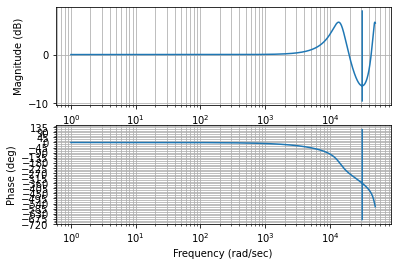

In [74]:
mag2, phase2, om2 = bode(Tzd, w)

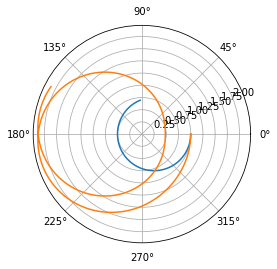

In [75]:
plt.polar(phase1, mag1, phase2, mag2)
plt.grid(True)

C:\Users\jimchen.AATECH\AppData\Local\Programs\Python\Python39\lib\site-packages\control\lti.py:199: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")
C:\Users\jimchen.AATECH\AppData\Local\Programs\Python\Python39\lib\site-packages\control\lti.py:199: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")


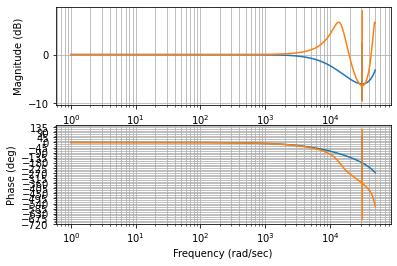

In [76]:
m, p, o = bode(Tz, Tzd, w)